In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#--Data Generation--

np.random.seed(10)
category = ["Electronics","Clothing","Home Goods","Software"]
product_category = [category[x] for x in np.random.randint(0,4,100)]
units_sold = np.random.randint(1,1000,100)
revenue = (units_sold * 250 + np.random.uniform(50000, 800000, 100)).round(2)


In [2]:
np.random.seed(10)

#--Data frame construction and data cleaning--

df = pd.DataFrame({"Product_Category":product_category, "Units_Sold":units_sold, "Revenue":revenue})
#--Creating Month column using pandas--
date_series=pd.date_range(start="01-01-2024",periods=24,freq='MS')
df["Month"]=np.random.choice(date_series,size=100)
df=df.sort_values(by='Month').reset_index(drop=True)
df['Month'] = df['Month'].dt.strftime('%b %Y')


df.loc[df.sample(n=10,random_state=12).index,'Revenue']=None
df.info()
print(f"\n{df.head()}\n\nDatatypes: \n{df.dtypes} \n\nNulls:\n {df.isnull().sum()}")
cat_avg_rev=df.groupby('Product_Category')['Revenue'].mean()

df['Revenue']=df['Revenue'].fillna(df['Product_Category'].map(cat_avg_rev))

print(f"\nShape: {df.shape}\n\nCorr:\n{df[['Units_Sold','Revenue']].corr()}")
print(f"\nAvg Rev by Cat:\n{df.groupby('Product_Category')['Revenue'].mean()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  100 non-null    object 
 1   Units_Sold        100 non-null    int64  
 2   Revenue           90 non-null     float64
 3   Month             100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB

  Product_Category  Units_Sold    Revenue     Month
0         Software         747  775702.11  Jan 2024
1      Electronics         918  709832.17  Jan 2024
2         Clothing         481  554500.61  Jan 2024
3         Software          83  455592.03  Jan 2024
4       Home Goods         287  270325.49  Jan 2024

Datatypes: 
Product_Category     object
Units_Sold            int64
Revenue             float64
Month                object
dtype: object 

Nulls:
 Product_Category     0
Units_Sold           0
Revenue             10
Month                0

In [3]:
#--Statistic Analysis--
df['Revenue'], df['Units_Sold'] = df['Revenue'].astype(float), df['Units_Sold'].astype(int)
print(f"\n\nStats:\n{df.describe()}\n\nMean: {df.Revenue.mean()}\nMedian: {df.Revenue.median()}\nStd: {df.Revenue.std()}\nMin: {df.Revenue.min()}\nMax: {df.Revenue.max()}")



Stats:
       Units_Sold        Revenue
count  100.000000     100.000000
mean   519.850000  527829.677298
std    276.522137  203276.788133
min     42.000000  105263.630000
25%    332.000000  391228.547500
50%    531.000000  548169.790000
75%    748.500000  668951.405000
max    990.000000  937924.590000

Mean: 527829.6772980072
Median: 548169.79
Std: 203276.78813260433
Min: 105263.63
Max: 937924.59


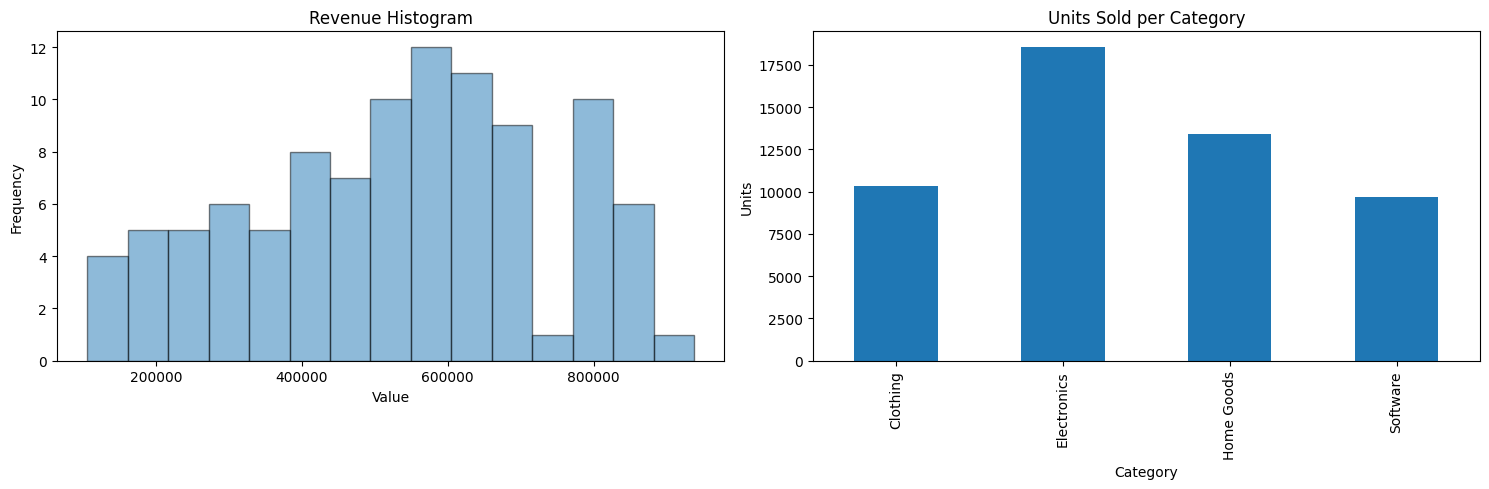

In [4]:
#--Visualization--
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(df['Revenue'], bins=15, edgecolor='black', alpha=0.5)
plt.title('Revenue Histogram'); plt.xlabel("Value"); plt.ylabel("Frequency")

plt.subplot(1,2,2)
df.groupby('Product_Category')['Units_Sold'].sum().plot(kind="bar")
plt.title('Units Sold per Category'); plt.xlabel("Category"); plt.ylabel("Units")
plt.tight_layout(); plt.show()

